## Постановка задачи 

<b>Суть проекта:</b> отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость
по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для 
каждого ученика школы. 

Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и 
составьте отчёт по его результатам. 

<b>Входные данные:</b> датасет из 395 строк, включающий в себя 29 признаков и целевую колонку для предсказания "score"

<b>Задача:</b> 
1. Очистить данные от выбросов.
2. Проанализировать качественный состав признаков, исключить ненужные.
3. Сформировать итоговый набор признаков, которые будут использоваться при разработке ML-модели.

## Импорт библиотек и данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
students = pd.read_csv("stud_math.xls")

In [3]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
students.rename(columns={'studytime, granular': 'studytime_gran'}, inplace=True)

In [5]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Функции

In [6]:
def categ_feature_describe(feature):
    """
    Функция для:
    1. Вывода количества пропусков (пустых значений) в категориальном признаке
    2. Вывода количества значений по категориям
    
    На вход подается имя колонки в датафрейме students
    """
    print('Пропусков: ', students[feature].isna().sum(), )
    print('Категории: ')
    print(students[feature].value_counts())

In [7]:
def get_boxplot(df, column, target):
    """
    Функция для визуального анализа (boxplot) влияния категориальных признаков на итоговый балл ученика.
    На вход подается:
    df - датафрейм
    column - имя анализируемой колонки в df
    target - имя колонки в df, влияние на которую исследуем
    """
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=target, 
                data=students.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [8]:
def get_stat_dif(df, column, target):
    """
    Функция для определения влияния категориальных признаков на итоговый балл ученика (тест Стьюдента).
    На вход подается:
    df - датафрейм
    column - имя анализируемой колонки в df
    target - имя колонки в df, влияние на которую исследуем
    """
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], target], 
                        df.loc[df.loc[:, column] == comb[1], target]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Признаки

#### school: <b><font color='green'>2 уникальных категории без пропусков, оставляем</font></b> 


In [9]:
categ_feature_describe('school')

Пропусков:  0
Категории: 
GP    349
MS     46
Name: school, dtype: int64


#### sex
<b><font color='green'>2 уникальных категории без пропусков, оставляем</font></b> 

In [10]:
categ_feature_describe('sex')

Пропусков:  0
Категории: 
F    208
M    187
Name: sex, dtype: int64


#### age 
<b><font color='green'>По возрасту - нормальное распределение со смещением вправо. Оставляем все значения, исходя из здравого смысла</font></b> 

In [11]:
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

0  пропусков.


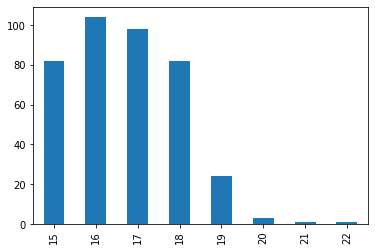

In [12]:
print(students.age.isna().sum(), ' пропусков.')
students.age.value_counts().sort_index().plot.bar()

#### address
<b><font color='green'>2 уникальных категории, 17 пропусков из 395, оставляем признак без изменений</font></b> 

In [13]:
categ_feature_describe('address')

Пропусков:  17
Категории: 
U    295
R     83
Name: address, dtype: int64


#### famsize
<b><font color='green'>2 уникальных категории, 27 пропусков из 395, оставляем</font></b> 

In [14]:
categ_feature_describe('famsize')

Пропусков:  27
Категории: 
GT3    261
LE3    107
Name: famsize, dtype: int64


#### Pstatus
<b><font color='green'>2 уникальных категории, 45 пропусков из 395, оставляем</font></b> 

In [15]:
categ_feature_describe('Pstatus')

Пропусков:  45
Категории: 
T    314
A     36
Name: Pstatus, dtype: int64


#### Medu
<b><font color='green'>5 уникальных категорий, 3 пропуска из 395, оставляем</font></b> 

In [16]:
categ_feature_describe('Medu')

Пропусков:  3
Категории: 
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


#### Fedu
<b><font color='green'>5 уникальных категорий, 24 пропуска из 395, оставляем все, кроме ошибочной категории (Fedu=40)</font></b> 

In [17]:
categ_feature_describe('Fedu')

Пропусков:  24
Категории: 
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


In [18]:
students = students.loc[students.Fedu != 40].reset_index()

#### Mjob
<b><font color='green'>5 уникальных категорий, 19 пропусков из 395, оставляем</font></b> 

In [19]:
categ_feature_describe('Mjob')

Пропусков:  19
Категории: 
other       133
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


#### Fjob
<b><font color='green'>5 уникальных категорий, 36 пропусков из 395, оставляем</font></b> 

In [20]:
categ_feature_describe('Fjob')

Пропусков:  36
Категории: 
other       196
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


#### reason
<b><font color='green'>4 уникальных категории, 17 пропусков из 395, оставляем</font></b> 

In [21]:
categ_feature_describe('reason')

Пропусков:  17
Категории: 
course        137
home          104
reputation    102
other          34
Name: reason, dtype: int64


#### guardian
<b><font color='green'>3 уникальных категории, 31 пропуск из 395, оставляем</font></b> 

In [22]:
categ_feature_describe('guardian')

Пропусков:  31
Категории: 
mother    250
father     85
other      28
Name: guardian, dtype: int64


#### traveltime
<b><font color='green'>4 уникальных категории, 28 пропусков из 395, оставляем</font></b> 

In [23]:
categ_feature_describe('traveltime')

Пропусков:  28
Категории: 
1.0    242
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64


#### studytime
<b><font color='green'>4 уникальных категории, 7 пропусков из 395, оставляем</font></b> 

In [24]:
categ_feature_describe('studytime')

Пропусков:  7
Категории: 
2.0    194
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64


#### failures
<b><font color='green'>4 уникальных категории, 22 пропуска из 395, оставляем</font></b> 

In [25]:
categ_feature_describe('failures')

Пропусков:  22
Категории: 
0.0    292
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


#### schoolsup
<b><font color='green'>2 уникальных категории, 9 пропусков из 395, оставляем</font></b> 

In [26]:
categ_feature_describe('schoolsup')

Пропусков:  9
Категории: 
no     334
yes     51
Name: schoolsup, dtype: int64


#### famsup
<b><font color='green'>2 уникальных категории, 39 пропусков из 395, оставляем</font></b> 

In [27]:
categ_feature_describe('famsup')

Пропусков:  39
Категории: 
yes    218
no     137
Name: famsup, dtype: int64


#### paid
<b><font color='green'>2 уникальных категории, 40 пропусков из 395, оставляем</font></b> 

In [28]:
categ_feature_describe('paid')

Пропусков:  40
Категории: 
no     199
yes    155
Name: paid, dtype: int64


#### activities
<b><font color='green'>2 уникальных категории, 14 пропусков из 395, оставляем</font></b> 

In [29]:
categ_feature_describe('activities')

Пропусков:  14
Категории: 
yes    194
no     186
Name: activities, dtype: int64


#### nursery
<b><font color='green'>2 уникальных категории, 16 пропусков из 395, оставляем</font></b> 

In [30]:
categ_feature_describe('nursery')

Пропусков:  16
Категории: 
yes    299
no      79
Name: nursery, dtype: int64


#### studytime_gran
<b><font color='green'>4 уникальных категории, 7 пропусков из 395, оставляем</font></b> 

In [31]:
categ_feature_describe('studytime_gran')

Пропусков:  7
Категории: 
-6.0     194
-3.0     103
-9.0      63
-12.0     27
Name: studytime_gran, dtype: int64


#### higher
<b><font color='green'>2 уникальных категории, 20 пропусков из 395, оставляем</font></b> 

In [32]:
categ_feature_describe('higher')

Пропусков:  20
Категории: 
yes    355
no      19
Name: higher, dtype: int64


#### internet
<b><font color='green'>2 уникальных категории, 34 пропуска из 395, оставляем</font></b> 

In [33]:
categ_feature_describe('internet')

Пропусков:  34
Категории: 
yes    304
no      56
Name: internet, dtype: int64


#### romantic
<b><font color='green'>2 уникальных категории, 31 пропуск из 395, оставляем</font></b> 

In [34]:
categ_feature_describe('romantic')

Пропусков:  31
Категории: 
no     239
yes    124
Name: romantic, dtype: int64


#### famrel
<b><font color='green'>5 уникальных категорий, 27 пропусков из 395, оставляем все, кроме ошибочной категории (famrel=-1)</font></b> 

In [35]:
categ_feature_describe('famrel')

Пропусков:  27
Категории: 
 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


In [36]:
students = students.loc[students.famrel != -1].reset_index()

#### freetime
<b><font color='green'>5 уникальных категорий, 11 пропусков из 395, оставляем</font></b> 

In [37]:
categ_feature_describe('freetime')

Пропусков:  11
Категории: 
3.0    153
4.0    112
2.0     61
5.0     38
1.0     18
Name: freetime, dtype: int64


#### goout
<b><font color='green'>5 уникальных категорий, 8 пропусков из 395, оставляем</font></b> 

In [38]:
categ_feature_describe('goout')

Пропусков:  8
Категории: 
3.0    127
2.0     99
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


#### health
<b><font color='green'>5 уникальных категорий, 15 пропусков из 395, оставляем</font></b> 

In [39]:
categ_feature_describe('health')

Пропусков:  15
Категории: 
5.0    137
3.0     89
4.0     62
1.0     47
2.0     43
Name: health, dtype: int64


#### absences
<b><font color='green'>Числовой признак, 12 пропусков. Считаем выбросами все значения, не входящие в IQR</font></b> 

In [40]:
print('Пропусков: ', students['absences'].isna().sum())

Пропусков:  12


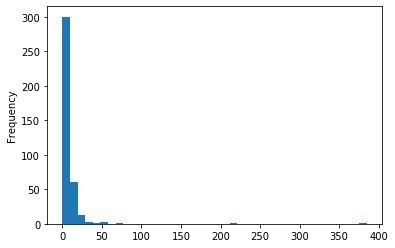

In [41]:
students.absences.plot.hist(bins = 40)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


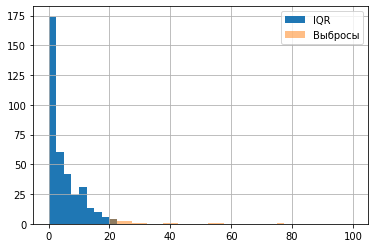

In [42]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 40
                                                                                              , range = (0, 100), 
                                                                                             label = 'IQR')
students.absences.loc[students.absences > perc75 + 1.5*IQR].hist(alpha = 0.5, bins = 40, range = (0, 100),
                                                        label = 'Выбросы')
plt.legend();

In [43]:
students = students.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

#### score
<b>Значение, которое нужно спрогнозировать. </b> 

В данных 5 пропусков, убираем их.

Выводы на данном этапе:
1. Примерно 10% учеников, судя по данным, набрало 0 баллов (постараемся найти причину).
2. За исключением этих учеников, остальные результаты нормально распределены между 25 и 100 баллами с медианой в 55 баллов

In [44]:
print('Пропусков: ', students['score'].isna().sum(), )
students = students[~students['score'].isna()]

Пропусков:  5


In [45]:
students.score.describe()

count    359.000000
mean      52.005571
std       23.007528
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Количество учеников, набравших 0 баллов: 36


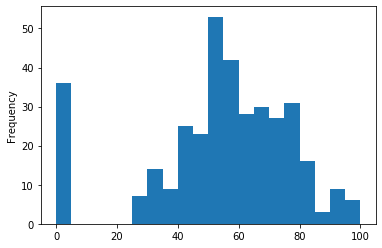

In [46]:
students.score.plot.hist(bins = 20)
print("Количество учеников, набравших 0 баллов:", len(students[students.score == 0]))

<b>Постараемся найти закономерность в кейсах, где score = 0</b>

In [47]:
students[students.score == 0]

,level_0,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
126,127,128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
128,129,130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
129,130,131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
132,133,134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
133,134,135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
134,135,136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
135,136,137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,139,140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
142,143,144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
144,145,146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


<b>Ничего не бросается в глаза, кроме того, что во всех случаях abcence=0.
То есть, ни один из этих учеников не пропустил ни одного занятия, при этом набрал 0 баллов на экзамене.
    
Это не выглядит правдоподобным, поэтому исключаем из выборки случаи, где score=0, за неимением лучшего варианта. </b>

In [48]:
students = students[students.score != 0]

In [49]:
students.score.describe()

count    323.000000
mean      57.801858
std       15.888716
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

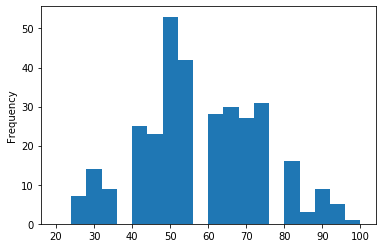

In [50]:
students.score.plot.hist(bins = 20, range = (20,100))

## Корреляционный анализ признаков

In [51]:
# убираем служебные колонки
students.drop(['level_0'], inplace = True, axis = 1) 
students.drop(['index'], inplace = True, axis = 1) 

<b>По сути, практически все наши признаки - категориальные, но есть подозрение, что один из них все же можно исключить. Поэтому смотрим все:</b>


G:\Conda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
G:\Conda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


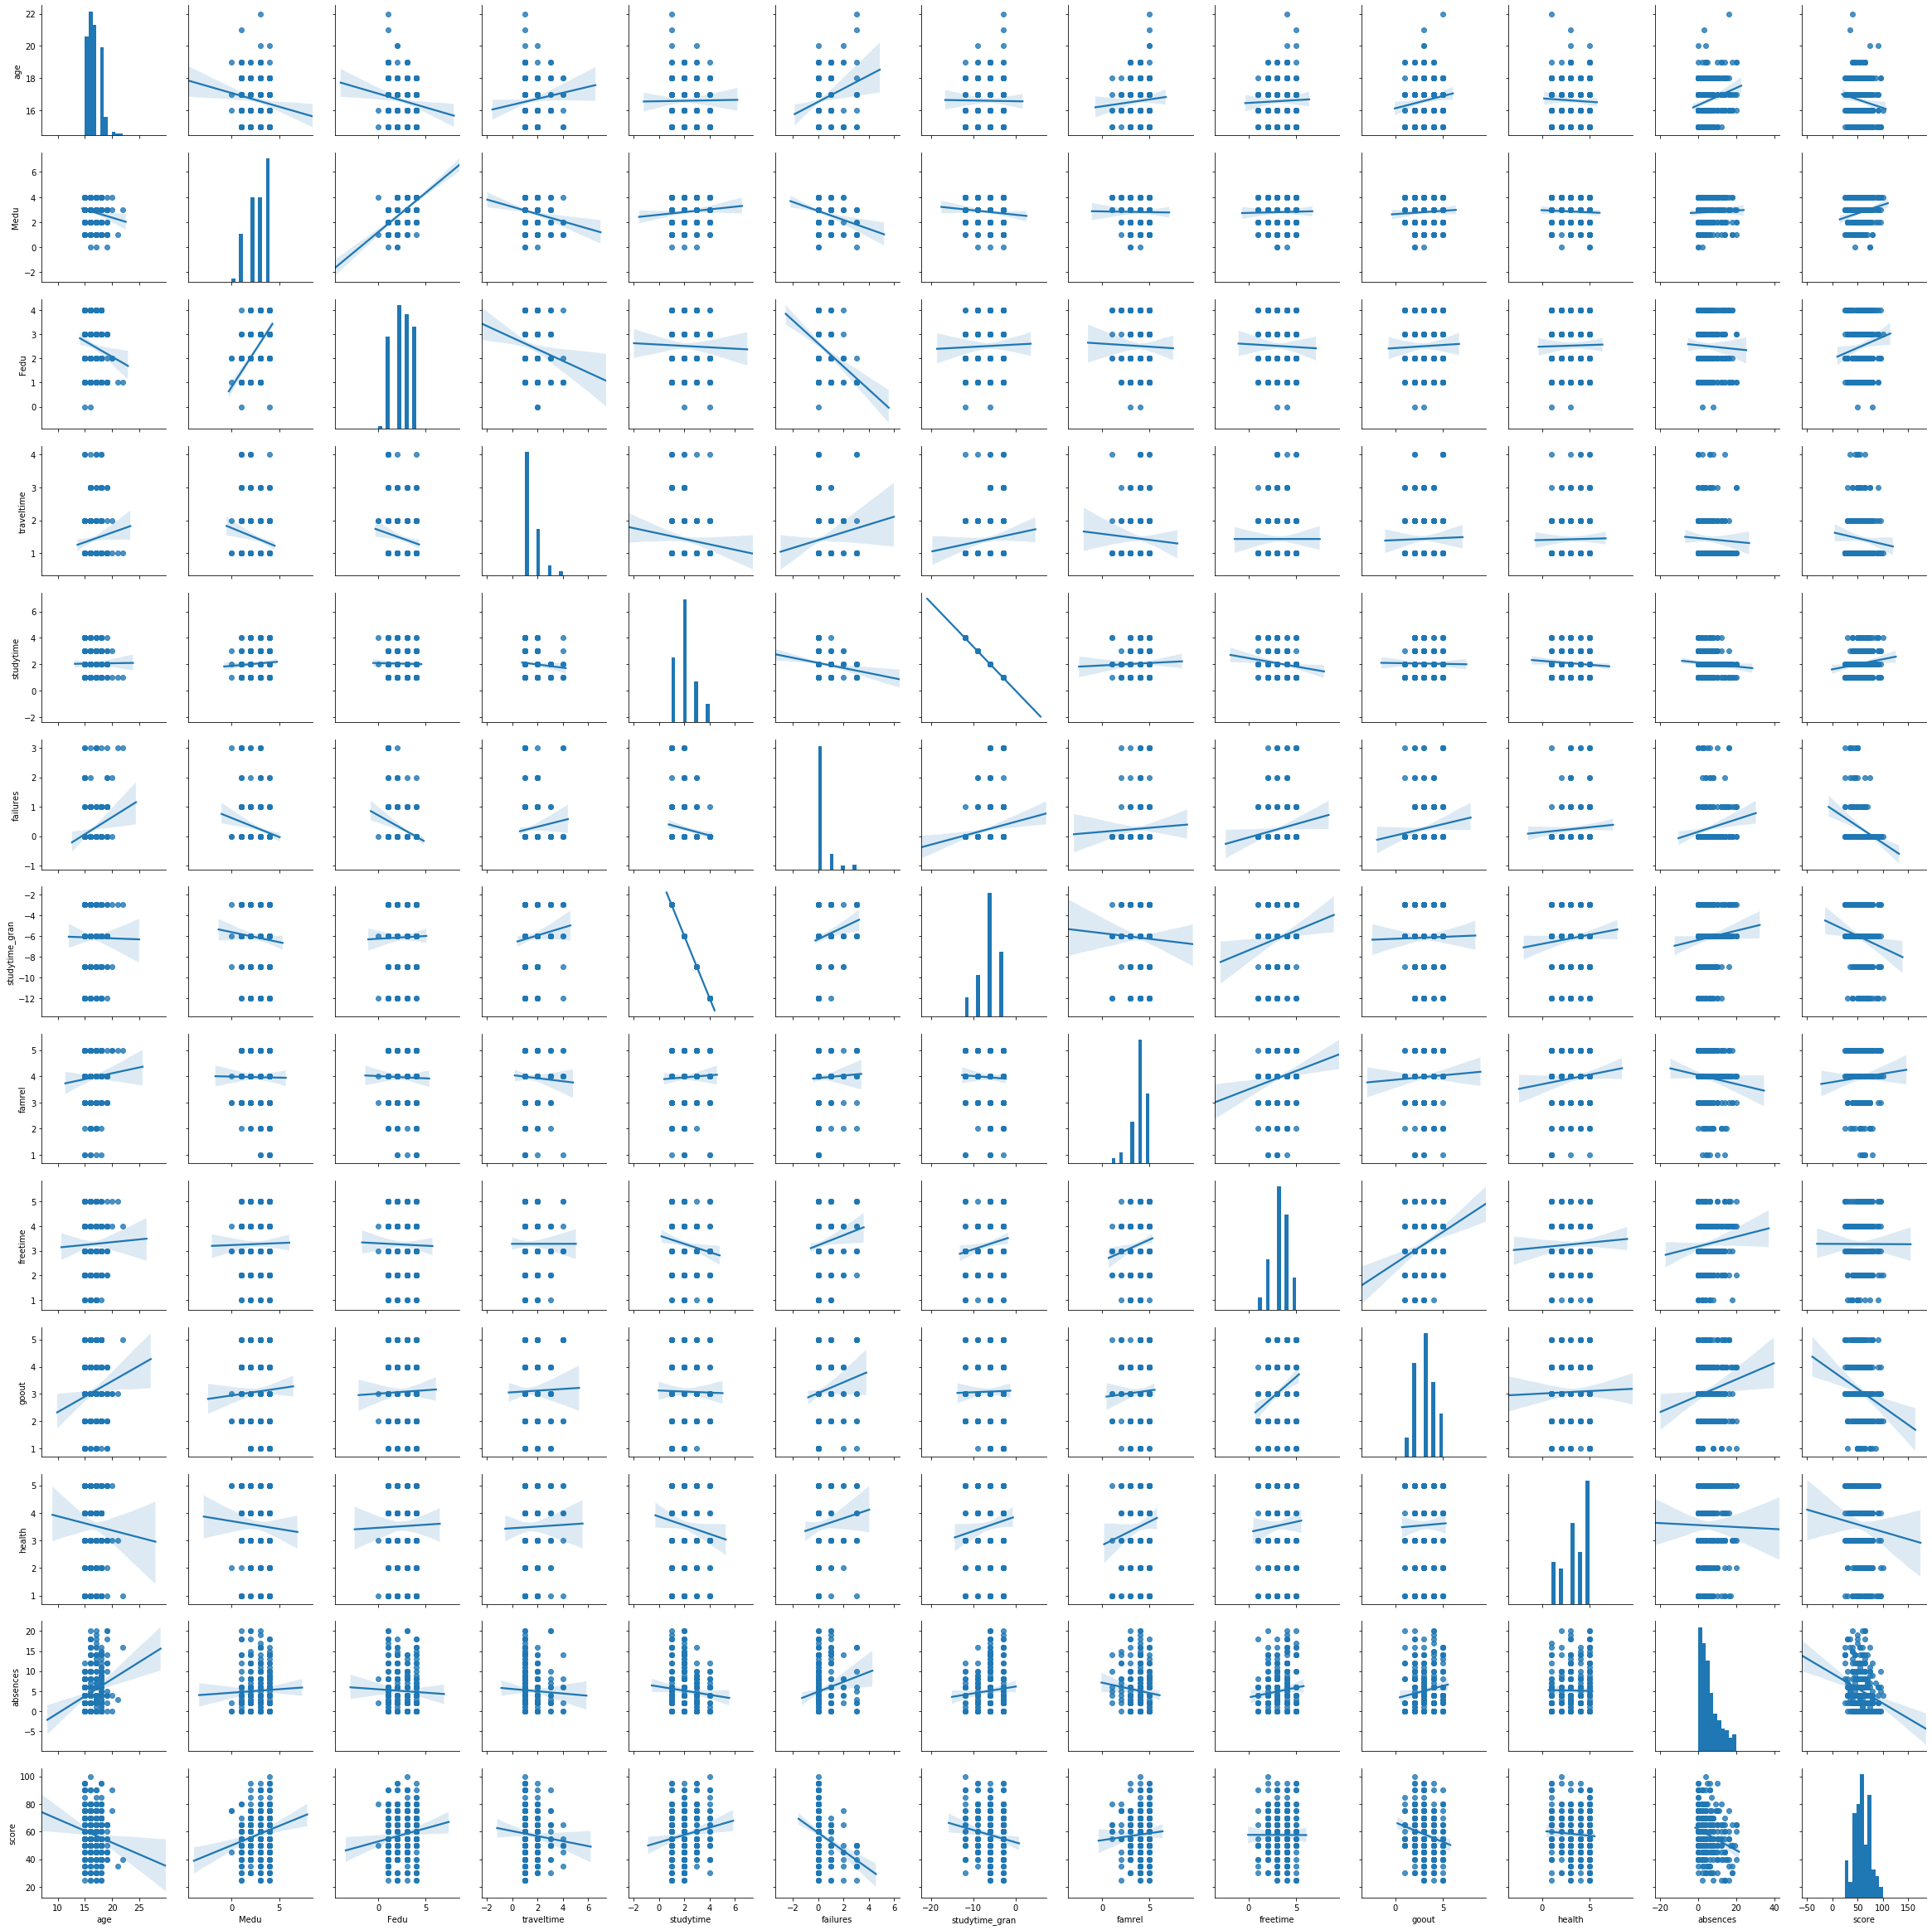

In [52]:
sns.pairplot(students, kind = 'reg')

In [53]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_gran,famrel,freetime,goout,health,absences,score
age,1.000000,-0.149440,-0.149149,0.104143,0.009456,0.218188,-0.009456,0.062057,0.027629,0.131431,-0.046187,0.212949,-0.133687
Medu,-0.149440,1.000000,0.618371,-0.186171,0.083114,-0.215600,-0.083114,-0.009984,0.017527,0.052087,-0.044468,0.038336,0.195561
Fedu,-0.149149,0.618371,1.000000,-0.157384,-0.022425,-0.295101,0.022425,-0.021132,-0.021813,0.025381,0.017237,-0.036955,0.132090
traveltime,0.104143,-0.186171,-0.157384,1.000000,-0.100852,0.113545,0.100852,-0.046520,0.000051,0.019683,0.014954,-0.039859,-0.081264
studytime,0.009456,0.083114,-0.022425,-0.100852,1.000000,-0.150283,-1.000000,0.038534,-0.146078,-0.015436,-0.096383,-0.087482,0.143353
failures,0.218188,-0.215600,-0.295101,0.113545,-0.150283,1.000000,0.150283,0.036131,0.135725,0.123393,0.071871,0.160568,-0.274951
studytime_gran,-0.009456,-0.083114,0.022425,0.100852,-1.000000,0.150283,1.000000,-0.038534,0.146078,0.015436,0.096383,0.087482,-0.143353
famrel,0.062057,-0.009984,-0.021132,-0.046520,0.038534,0.036131,-0.038534,1.000000,0.155824,0.040824,0.111756,-0.094452,0.056988
freetime,0.027629,0.017527,-0.021813,0.000051,-0.146078,0.135725,0.146078,0.155824,1.000000,0.277194,0.053220,0.098142,-0.001452
goout,0.131431,0.052087,0.025381,0.019683,-0.015436,0.123393,0.015436,0.040824,0.277194,1.000000,0.023427,0.137256,-0.192764


<b>Так и есть: убеждаемся, что есть полная (обратная) корреляция признака studytime и studytime_gran. Удаляем последний</b>


In [54]:
students.drop(['studytime_gran'], inplace = True, axis = 1) 

<b>Анализируем категориальные признаки</b>


In [55]:
category_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                      'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                      'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                      'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

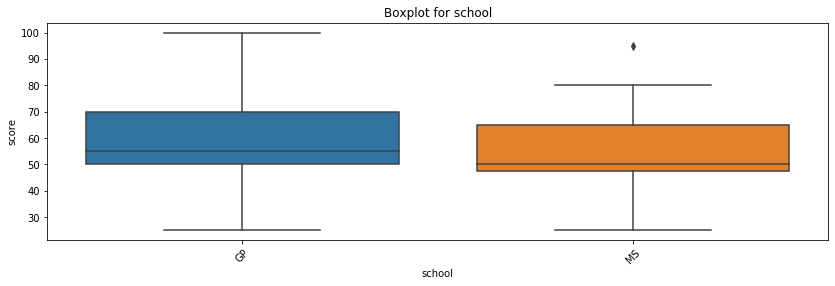

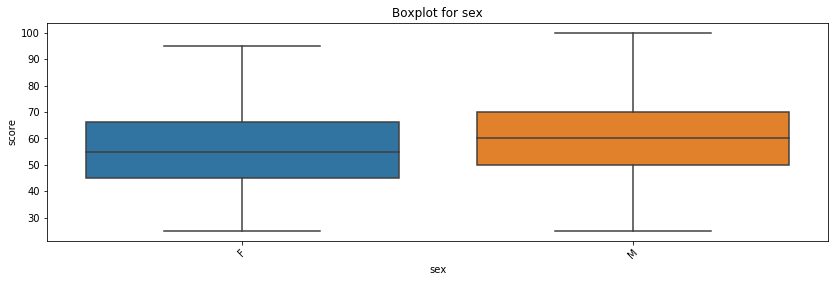

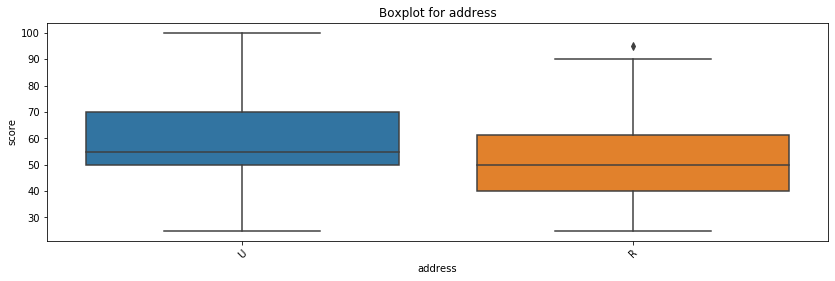

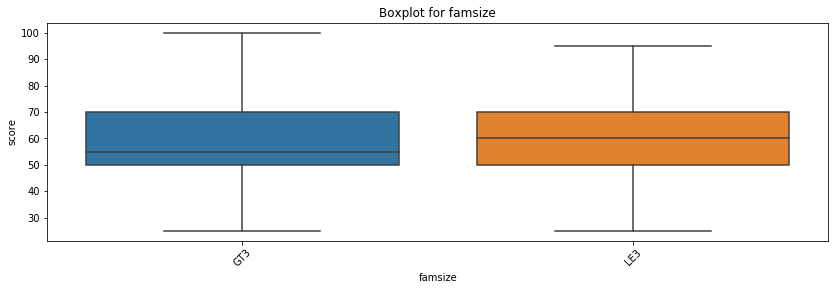

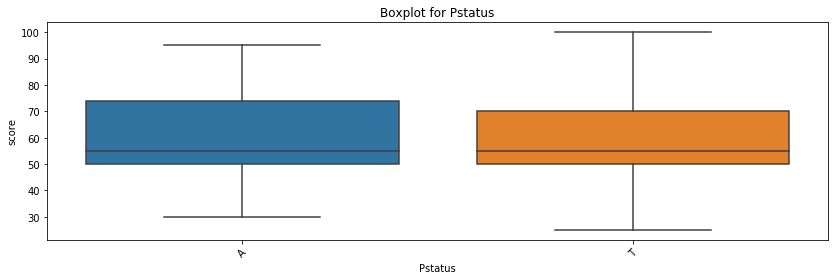

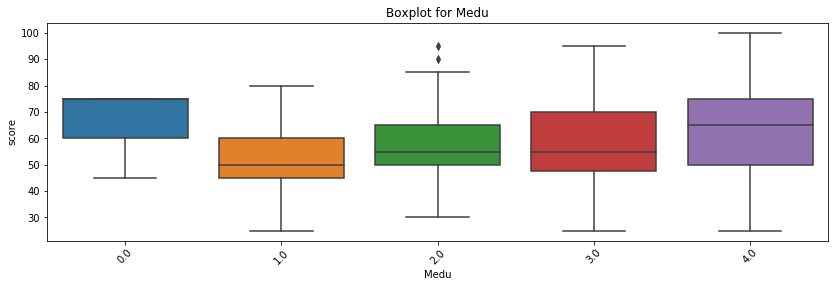

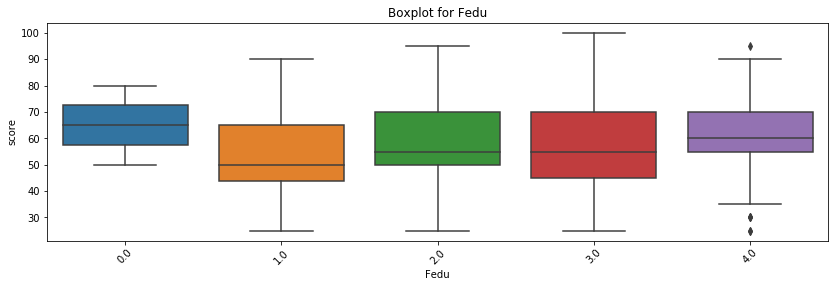

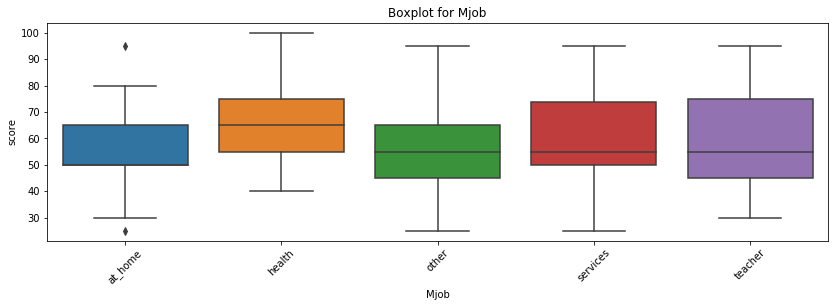

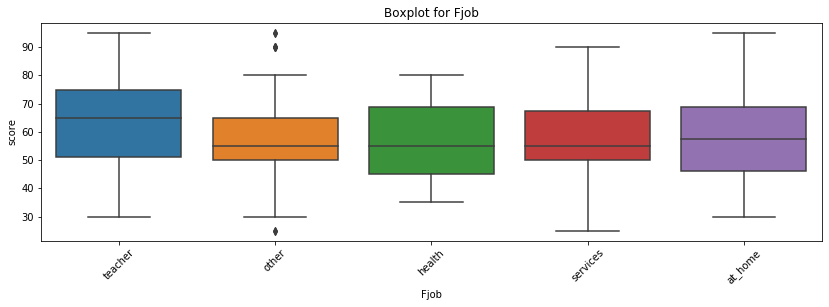

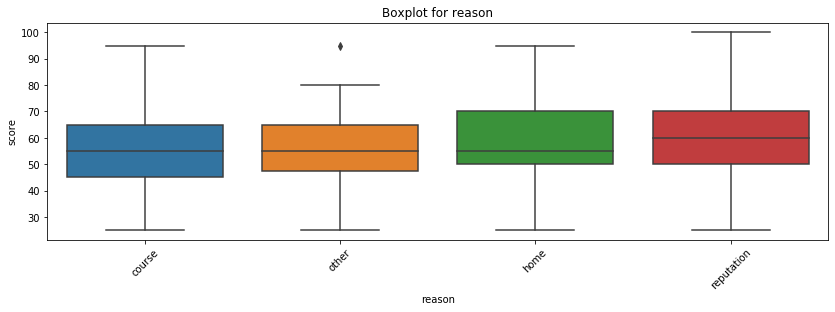

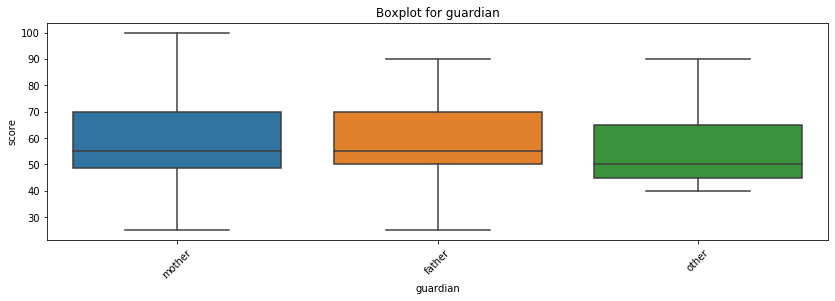

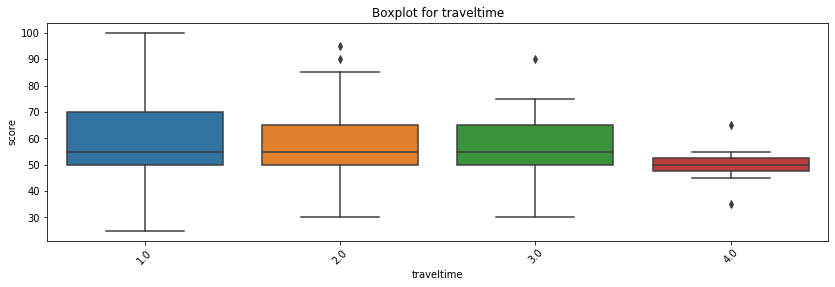

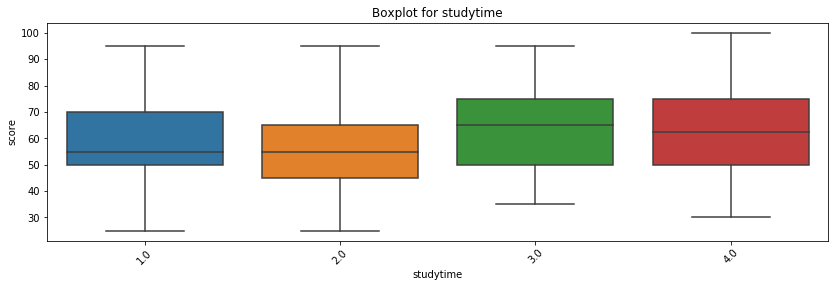

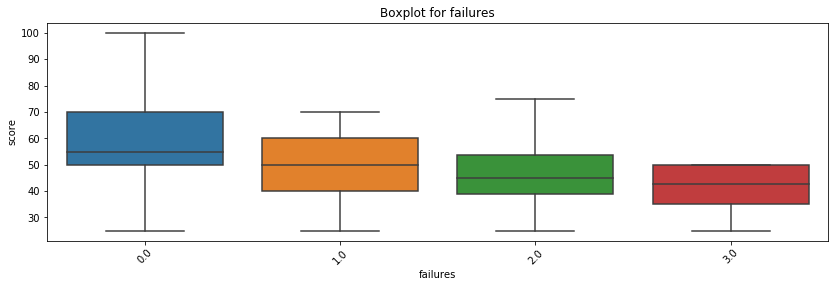

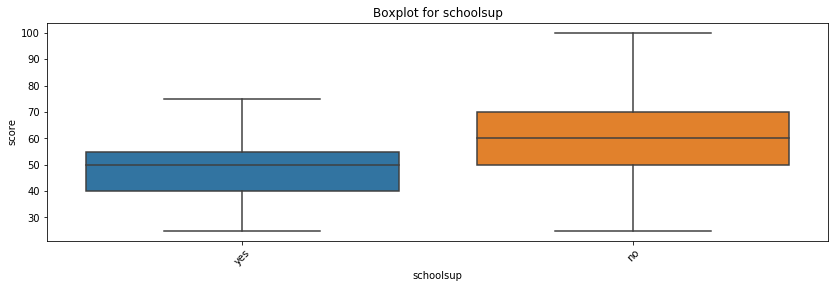

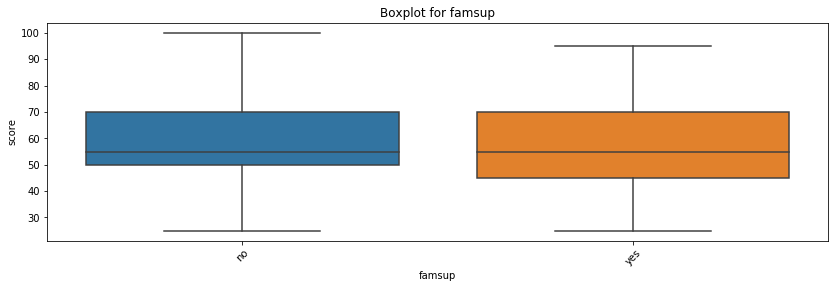

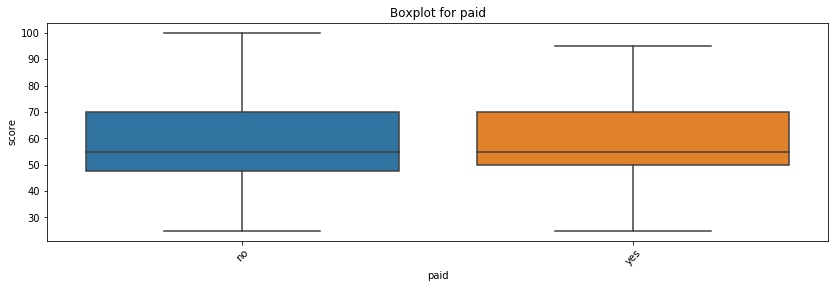

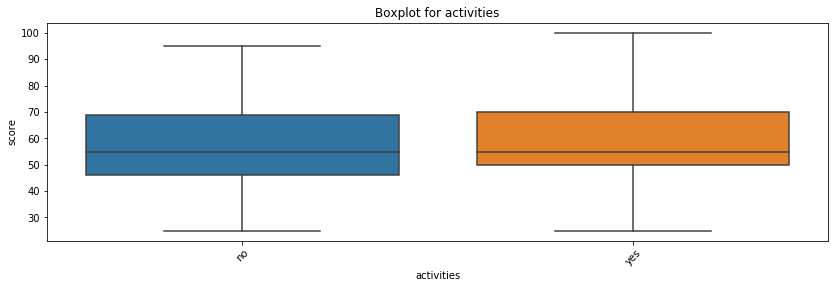

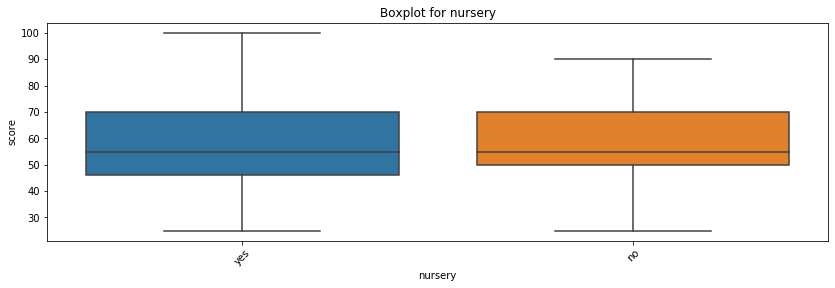

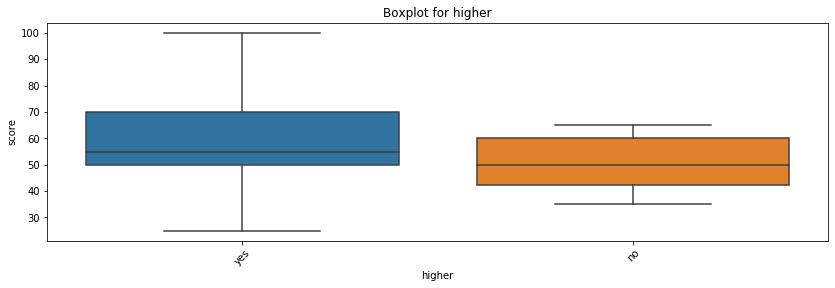

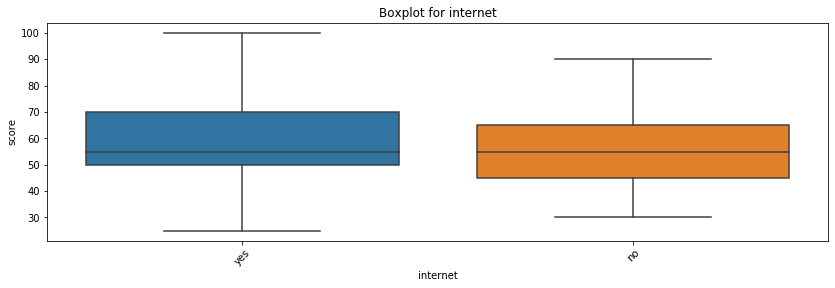

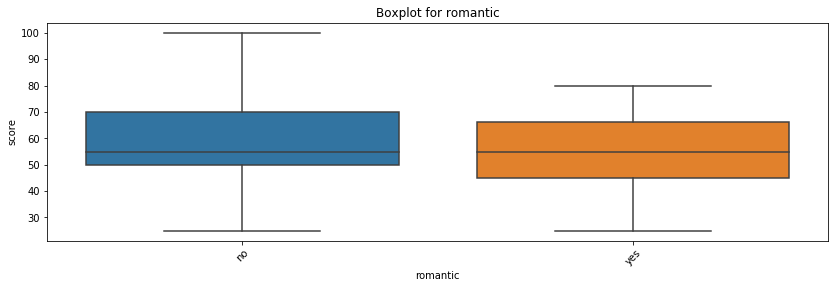

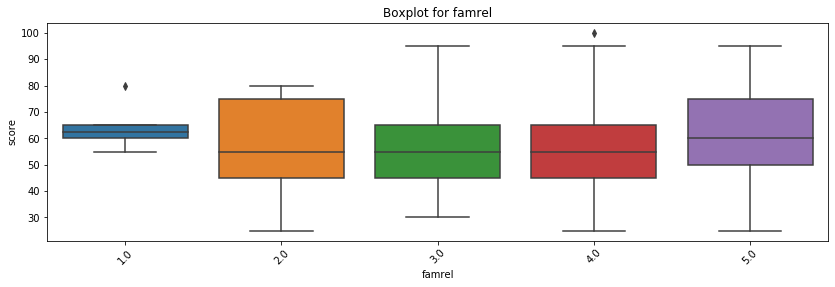

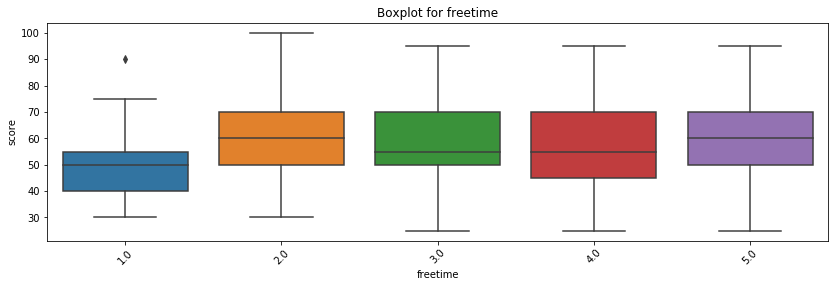

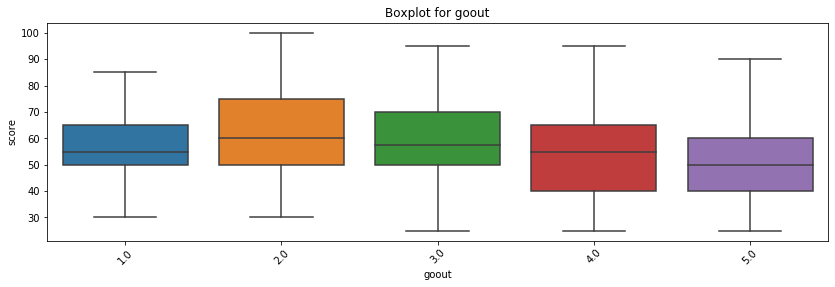

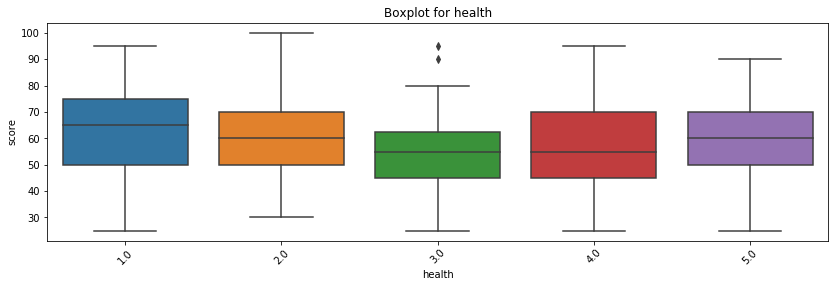

In [56]:
for col in category_features:
    get_boxplot(students, col, 'score')

<b>Визуально сложно исключить какой-либо признак из существенных (так как все они при изменении заметно влияют на распределение баллов)

Самые явные, на мой взгляд, кандидаты на исключение:
famsize, Pstatus, guardian, paid, activities, nursery
 
Обратимся к статистике. Тест Стьюдента:</b>

In [57]:
for col in category_features:
    get_stat_dif(students, col, 'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


(!) Интересный факт: тест Стьюдента исключил все признаки, в которых были только 2 варианта значения.

## ВЫВОДЫ 

Исходя из учебных материалов, мы должны оставить следующие категориальные признаки:
       address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout
       
Тем не менее, при наличии технической возможности анализа большего количества признаков (если бы задача была боевая), я бы не стал исключать эти фичи. Причина - чисто эмпирически и экспертно есть ощущение, что большая часть этих фичей может оказывать влияние на итоговый бал. Эти данные вполне хорошего качества (чистые), поэтому, на мой взгляд, можно попробовать найти скрытые зависимости при построении модели. 


Итак, имеем 2 итоговых (в зависимости от ситуации) списка фичей, которые нужно анализировать для решения исходной задачи:

<b>Основной ответ:</b>

    age, absences, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout

<i><b>Расширенный ответ:</b></i>

    age, absences, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout 
    + 
    famrel, famsup, Fjob, freetime, health, higher, internet, reason, romantic, school, sex, studytime, traveltime                      